In [2]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.8.1
    Uninstalling diffusers-0.8.1:
      Successfully uninstalled diffusers-0.8.1

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from diffuserslib import loginHuggingFace, DiffusersPipelines

loginHuggingFace('token')

diffusers = DiffusersPipelines(device = "mps", safety_checker=False)
diffusers.createTextToImagePipeline()

# First-time "warmup" pass because of issue with m1 cpu: https://github.com/huggingface/diffusers/issues/372
_, _ = diffusers.textToImage(prompt="", negprompt="", steps=5, scale=7, width=512, height=512)



/Users/roberte/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /Users/roberte/.huggingface/token
Login successful
Creating text to image pipeline from model runwayml/stable-diffusion-v1-5


Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 6781.05it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


cpu


100%|██████████| 6/6 [00:06<00:00,  1.04s/it]


cpu


  0%|          | 0/20 [00:00<?, ?it/s]/Users/roberte/miniconda3/lib/python3.9/site-packages/diffusers/schedulers/scheduling_euler_discrete.py:126: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  step_index = (self.timesteps == timestep).nonzero().item()
100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


Seed: 2101123409


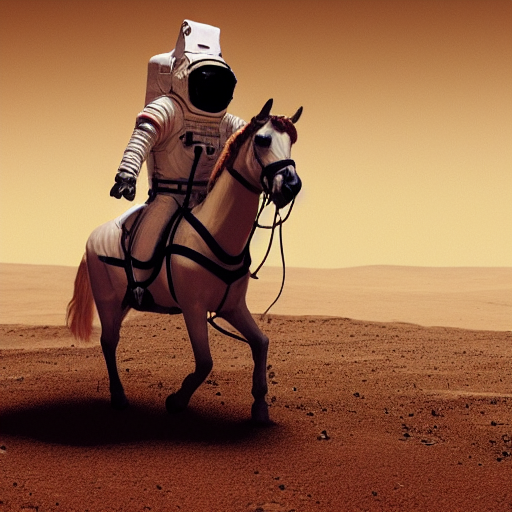

In [2]:
from IPython.display import display

prompt = "a photo of an astronaut riding a horse on mars"

image, seed = diffusers.textToImage(prompt=prompt, negprompt="", steps=20, scale=7, width=512, height=512, scheduler="EulerDiscreteScheduler", seed=2101123409)

print(f"Seed: {seed}")
display(image)
